usei menos > https://machinelearningmastery.com/calculate-feature-importance-with-python/
usei > https://machinelearningmastery.com/feature-selection-machine-learning-python/
usei > https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [1]:
data_salvar_modelo = '220603_eua_fi_turbidez'

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from collections import Counter
import random
#!pip3 install pickle5
#import pickle5 as pickle
import pickle
import glob
from matplotlib import pyplot

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
#!pip install imblearn
from  imblearn.under_sampling  import  CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
# https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

#!pip install xgboost==0.90
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
'''# ler dataset
data = pd.read_excel('4647_dataset_clorofila_classif_iqar.xlsx')

df_mask = data['Dominio'] == 'Estados_Unidos'
data = data[df_mask]

df = data[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','Classe']]
df = df.dropna()
df['Classe'] = df['Classe'] - 1
df

In [3]:
# pegar somente amostras com QA60 (pegar <=0) e NUVEM_SOMBRA (pegar diferente de Cloud)
data = pd.read_csv('turbidez_classes.csv', delimiter=';')
df_mask = data['Dominio'] == 'Estados_Unidos'
data = data[df_mask]
df_filtro = data.loc[(data['QA60'] <= 0) & (data['NUVEM_SOMBRA'] != 'CLOUD')]
# apagar linhas que contem NaN
df_filtro = df_filtro.dropna()
# filtrar so para bandas e classe
df = df_filtro[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','Classe']]
df['Classe'] = df['Classe'] - 1
df

,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,Classe
0,115.0,177.0,168.0,86.0,74.0,32.0,52.0,32.0,26.0,17.0,40.0,36.0,0
1,468.0,385.0,354.0,278.0,299.0,300.0,327.0,279.0,302.0,551.0,253.0,177.0,0
2,524.0,598.0,670.0,501.0,597.0,561.0,583.0,811.0,586.0,1638.0,529.0,345.0,0
3,611.0,667.0,649.0,589.0,610.0,664.0,694.0,680.0,648.0,462.0,557.0,451.0,0
4,468.0,385.0,354.0,278.0,299.0,300.0,327.0,279.0,302.0,551.0,253.0,177.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,962.0,1214.0,1705.0,2225.0,2617.0,2949.0,3066.0,3088.0,3117.0,2693.0,3364.0,3019.0,3
5820,524.0,598.0,670.0,501.0,597.0,561.0,583.0,811.0,586.0,1638.0,529.0,345.0,3
5821,197.0,199.0,293.0,194.0,147.0,50.0,50.0,33.0,40.0,11.0,66.0,53.0,3
5822,224.0,275.0,299.0,167.0,256.0,312.0,373.0,283.0,307.0,665.0,114.0,114.0,3


In [4]:
# contar classes
print('Quantidade por classe:')
print(df['Classe'].value_counts())

# filtrar por classe
df_1 = df[df['Classe']==0]
df_2 = df[df['Classe']==1]
df_3 = df[df['Classe']==2]
df_4 = df[df['Classe']==3]
#df_5 = df[df['Classe']==5]
#df_6 = df[df['Classe']==6]

Quantidade por classe:
0    3744
1     160
3      37
2      26
Name: Classe, dtype: int64


In [8]:
#separar treino e teste
qtd_amostras_treino = 150

randomlist = random.sample(range(0, df_1.shape[0]), qtd_amostras_treino)
df_1_train = df_1.iloc[randomlist]
df_1_test = df_1.drop(df_1.index[randomlist])

randomlist = random.sample(range(0, df_2.shape[0]), qtd_amostras_treino)
df_2_train = df_2.iloc[randomlist]
df_2_test = df_2.drop(df_2.index[randomlist])

randomlist = random.sample(range(0, df_3.shape[0]), qtd_amostras_treino)
df_3_train = df_3.iloc[randomlist]
df_3_test = df_3.drop(df_3.index[randomlist])

randomlist = random.sample(range(0, df_4.shape[0]), qtd_amostras_treino)
df_4_train = df_4.iloc[randomlist]
df_4_test = df_4.drop(df_4.index[randomlist])

randomlist = random.sample(range(0, df_5.shape[0]), qtd_amostras_treino)
df_5_train = df_5.iloc[randomlist]
df_5_test = df_5.drop(df_5.index[randomlist])

randomlist = random.sample(range(0, df_6.shape[0]), qtd_amostras_treino)
df_6_train = df_6.iloc[randomlist]
df_6_test = df_6.drop(df_6.index[randomlist])

print('Classe 1 - treino:', df_1_train.shape[0], '/ teste:', df_1_test.shape[0])
print('Classe 2 - treino:', df_2_train.shape[0], '/ teste:', df_2_test.shape[0])
print('Classe 3 - treino:', df_3_train.shape[0], '/ teste:', df_3_test.shape[0])
print('Classe 4 - treino:', df_4_train.shape[0], '/ teste:', df_4_test.shape[0])
print('Classe 5 - treino:', df_5_train.shape[0], '/ teste:', df_5_test.shape[0])
print('Classe 6 - treino:', df_6_train.shape[0], '/ teste:', df_6_test.shape[0])

Classe 1 - treino: 150 / teste: 11
Classe 2 - treino: 150 / teste: 83
Classe 3 - treino: 150 / teste: 110
Classe 4 - treino: 150 / teste: 226
Classe 5 - treino: 150 / teste: 401
Classe 6 - treino: 150 / teste: 99


In [9]:
# concatenar dataframes
frames_train = [df_1_train, df_2_train, df_3_train, df_4_train, df_5_train, df_6_train]
df_train = pd.concat(frames_train)
frames_test = [df_1_test, df_2_test, df_3_test, df_4_test, df_5_test, df_6_test]
df_test = pd.concat(frames_test)
#print('Tamanho train:', df_train.shape)
#print('Tamanho test:', df_test.shape)

# separar entrada e rotulo do treino e teste
X_train = df_train.to_numpy()[:,:12]
y_train = df_train.to_numpy()[:,12].astype(int)
X_test = df_test.to_numpy()[:,:12]
y_test = df_test.to_numpy()[:,12].astype(int)

print('Tamanho train:', X_train.shape, '/ rotulos:', y_train.shape)
print('Tamanho test:', X_test.shape, '/ rotulos:', y_test.shape)

Tamanho train: (900, 12) / rotulos: (900,)
Tamanho test: (930, 12) / rotulos: (930,)


In [10]:
#padronizando dados antes do treinamento
scaler = StandardScaler()

norm_X_train = scaler.fit_transform(X_train)
norm_X_test = scaler.transform(X_test)

In [10]:
norm_X_train = X_train
norm_X_test = X_test

# Selecao univariada

In [5]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df.loc[:, df.columns != 'Classe']
Y = df['Classe']

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 0.025  0.621  5.507  6.389 16.225  7.828  8.975  7.387  5.547  3.044
  2.059  1.376]
[[ 74.  32.  52.  32.]
 [299. 300. 327. 279.]
 [597. 561. 583. 811.]
 [610. 664. 694. 680.]
 [299. 300. 327. 279.]]


# RFE - Eliminação do recurso recursivo

In [6]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.loc[:, df.columns != 'Classe']
Y = df['Classe']

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, step=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 6
Selected Features: [ True False  True False  True  True  True False False False False  True]
Feature Ranking: [1 3 1 2 1 1 1 3 2 3 2 1]


In [7]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X = df.loc[:, df.columns != 'Classe']
y = df['Classe']

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.943 (0.009)


>2 0.940 (0.009)
>3 0.943 (0.009)
>4 0.942 (0.010)
>5 0.943 (0.009)
>6 0.944 (0.008)
>7 0.944 (0.009)
>8 0.945 (0.008)
>9 0.944 (0.008)


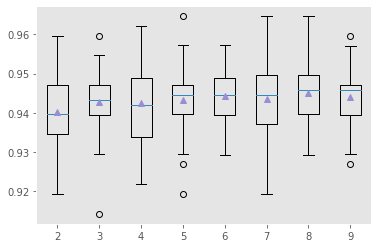

In [8]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    # define dataset
    X = df.loc[:, df.columns != 'Classe']
    y = df['Classe']
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [9]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X = df.loc[:, df.columns != 'Classe']
y = df['Classe']

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.944 (0.006)


In [10]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset
X = df.loc[:, df.columns != 'Classe']
y = df['Classe']

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected False, Rank: 8.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 7.000
Column: 6, Selected False, Rank: 5.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 6.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 2.000
Column: 11, Selected True, Rank: 1.000


>lr 0.945 (0.008)
>per 0.943 (0.009)
>cart 0.943 (0.009)
>rf 0.944 (0.009)
>gbm 0.944 (0.008)


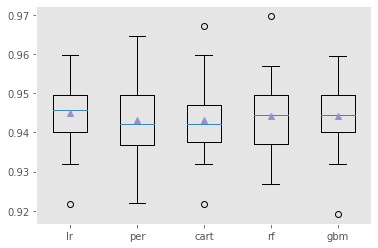

In [16]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    # define dataset
    X = df.loc[:, df.columns != 'Classe']
    y = df['Classe']
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# PCA

In [12]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

X = df.loc[:, df.columns != 'Classe']
Y = df['Classe']

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.91  0.047 0.024]
[[ 0.206  0.244  0.248  0.252  0.282  0.303  0.308  0.32   0.31   0.397
   0.295  0.251]
 [-0.185 -0.321 -0.359 -0.325 -0.244 -0.009  0.037  0.045  0.103  0.743
   0.048 -0.029]
 [ 0.405  0.263  0.253  0.148  0.06  -0.214 -0.268 -0.317 -0.333  0.508
  -0.262 -0.148]]


# Importancia do recurso

In [13]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

X = df.loc[:, df.columns != 'Classe']
Y = df['Classe']

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.061 0.065 0.08  0.1   0.145 0.084 0.065 0.085 0.067 0.084 0.083 0.082]


# Regressao linear

Feature: 0, Score: 0.60219
Feature: 1, Score: -4.09705
Feature: 2, Score: 3.78175
Feature: 3, Score: -4.09254
Feature: 4, Score: 5.26354
Feature: 5, Score: -6.00965
Feature: 6, Score: 6.72487
Feature: 7, Score: 1.58199
Feature: 8, Score: -3.75261
Feature: 9, Score: 0.16924
Feature: 10, Score: 0.32437
Feature: 11, Score: -0.52690


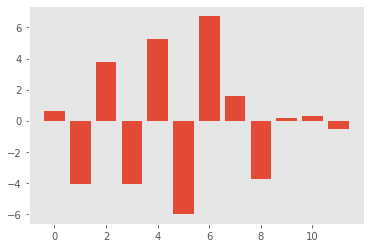

In [21]:
# define the model
model = LinearRegression()
# fit the model
model.fit(norm_X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Arvore de decisao

Feature: 0, Score: 0.09325
Feature: 1, Score: 0.09896
Feature: 2, Score: 0.05980
Feature: 3, Score: 0.11064
Feature: 4, Score: 0.17430
Feature: 5, Score: 0.06186
Feature: 6, Score: 0.03029
Feature: 7, Score: 0.06317
Feature: 8, Score: 0.04568
Feature: 9, Score: 0.09187
Feature: 10, Score: 0.08781
Feature: 11, Score: 0.08238


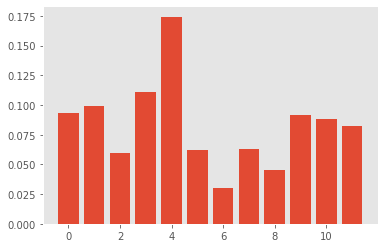

In [25]:
model = DecisionTreeClassifier()
# fit the model
model.fit(norm_X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Naive Bayes

Melhores hiperparametros do modelo: {'var_smoothing': 0.001}

Acuracia:  0.14193548387096774
              precision    recall  f1-score   support

           0       0.06      0.18      0.09        11
           1       0.00      0.00      0.00        83
           2       0.13      0.72      0.22       110
           3       0.27      0.12      0.16       226
           4       0.67      0.00      0.01       401
           5       0.14      0.23      0.17        99

    accuracy                           0.14       930
   macro avg       0.21      0.21      0.11       930
weighted avg       0.38      0.14      0.09       930



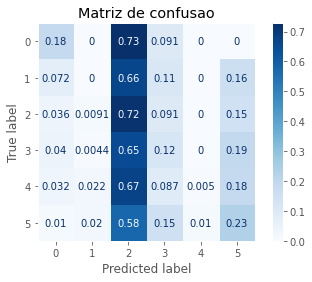

In [9]:
#treinar naive bayes

# pesquisa em grade
param_grid_nb = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

grid_nb = GridSearchCV(GaussianNB(),param_grid_nb,refit=True)
grid_nb.fit(norm_X_train,y_train)

print('Melhores hiperparametros do modelo:', grid_nb.best_params_)

#################################

# salvar o modelo no disco
pickle.dump(grid_nb, open(data_salvar_modelo+'_nb.pkl', 'wb'))

# carregar o modelo salvo em disco
#loaded_model = pickle.load(open(data_salvar_modelo+'rf_com_cluster.pkl', 'rb'))
#result = loaded_model.score(norm_X_teste_com_cluster, y_teste)
#print(result)

#################################

# testar
grid_nb_predictions = grid_nb.predict(norm_X_test)
print('\nAcuracia: ', accuracy_score(y_test, grid_nb_predictions))
#print(confusion_matrix(y_teste,grid_nb_predictions))
print(classification_report(y_test, grid_nb_predictions))

# matrix de confusao
matrix = plot_confusion_matrix(grid_nb, norm_X_test, y_test,cmap=plt.cm.Blues)
plt.title('Matriz de confusao')
plt.show(matrix)
plt.show()

# SVM

Melhores hiperparametros do modelo: {'C': 1000, 'gamma': 1, 'kernel': 'poly'}

Acuracia:  0.4236559139784946
              precision    recall  f1-score   support

           0       0.10      0.82      0.17        11
           1       0.26      0.48      0.34        83
           2       0.30      0.39      0.34       110
           3       0.38      0.28      0.32       226
           4       0.72      0.42      0.53       401
           5       0.50      0.71      0.58        99

    accuracy                           0.42       930
   macro avg       0.38      0.52      0.38       930
weighted avg       0.52      0.42      0.44       930



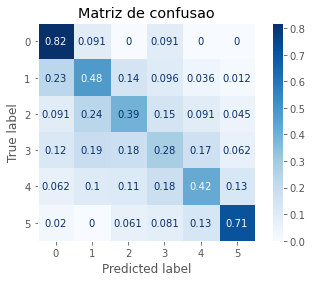

In [10]:
# treinar svm

# pesquisa em grade
param_grid_svm = {'C': [0.1,1, 10, 100,1000], 
                  'gamma': [1,0.1,0.01,0.001,0.0001], 
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_svm = GridSearchCV(SVC(),param_grid_svm,refit=True, n_jobs=-1)
grid_svm.fit(norm_X_train,y_train)

print('Melhores hiperparametros do modelo:', grid_svm.best_params_)

#################################

# salvar o modelo no disco
pickle.dump(grid_svm, open(data_salvar_modelo+'_svm_com_cluster.pkl', 'wb'))

# carregar o modelo salvo em disco
#loaded_model = pickle.load(open(data_salvar_modelo+'svm.pkl', 'rb'))
#result = loaded_model.score(norm_X_teste_com_cluster, y_teste)
#print(result)

#################################

# testar
grid_svm_predictions = grid_svm.predict(norm_X_test)
print('\nAcuracia: ', accuracy_score(y_test, grid_svm_predictions))
#print(confusion_matrix(y_teste,grid_svm_predictions))
print(classification_report(y_test, grid_svm_predictions))

# matrix de confusao
matrix = plot_confusion_matrix(grid_svm, norm_X_test, y_test,cmap=plt.cm.Blues)
plt.title('Matriz de confusao')
plt.show(matrix)
plt.show()

# Random Forest

Melhores hiperparametros do modelo: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Acuracia:  0.43333333333333335
              precision    recall  f1-score   support

           0       0.14      0.73      0.23        11
           1       0.26      0.40      0.31        83
           2       0.33      0.39      0.36       110
           3       0.41      0.38      0.39       226
           4       0.72      0.41      0.52       401
           5       0.39      0.70      0.50        99

    accuracy                           0.43       930
   macro avg       0.37      0.50      0.39       930
weighted avg       0.52      0.43      0.45       930



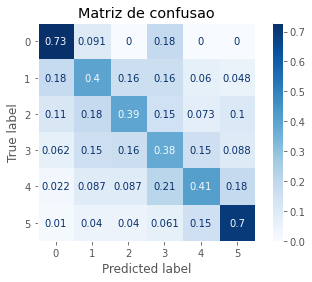

In [11]:
#treinar random forest

# pesquisa em grade
param_grid_rf = {'bootstrap': [True, False], 
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
            'max_features': ['auto', 'sqrt'], 
            'min_samples_leaf': [1, 2, 4], 
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf,refit=True, n_jobs=-1)
grid_rf.fit(norm_X_train,y_train)

print('Melhores hiperparametros do modelo:', grid_rf.best_params_)

#################################

# salvar o modelo no disco
pickle.dump(grid_rf, open(data_salvar_modelo+'_rf.pkl', 'wb'))

# carregar o modelo salvo em disco
#loaded_model = pickle.load(open(data_salvar_modelo+'rf_com_cluster.pkl', 'rb'))
#result = loaded_model.score(norm_X_teste_com_cluster, y_teste)
#print(result)

#################################

# testar
grid_rf_predictions = grid_rf.predict(norm_X_test)
print('\nAcuracia: ', accuracy_score(y_test, grid_rf_predictions))
#print(confusion_matrix(y_teste,grid_rf_predictions))
print(classification_report(y_test, grid_rf_predictions))

# matrix de confusao
matrix = plot_confusion_matrix(grid_rf, norm_X_test, y_test,cmap=plt.cm.Blues)
plt.title('Matriz de confusao')
plt.show(matrix)
plt.show()

# XGBoost

In [13]:
#treinar xgboost

# pesquisa em grade
param_grid_xgb = { 'min_child_weight': [1, 5, 10], 
                  'gamma': [0.5, 1, 1.5, 2, 5], 
                  'subsample': [0.6, 0.8, 1.0], 
                  'colsample_bytree': [0.6, 0.8, 1.0], 
                  'n_estimators': [400, 500, 600, 700], 
                  'learning_rate': [0.1, 0.01, 0.001],
                  'max_depth': [3, 4, 5] }

grid_xgb = GridSearchCV(XGBClassifier(objective='binary:logistic', 
                                      silent=True, nthread=-1, verbosity = 0, 
                                      use_label_encoder=False, n_jobs=-1),
                        param_grid_xgb, refit=True, verbose=True)

#le = LabelEncoder()
#y_train = le.fit_transform(y_train)

grid_xgb.fit(norm_X_train,y_train.astype(int))

print('Melhores hiperparametros do modelo:', grid_xgb.best_params_)

#################################

# salvar o modelo no disco
pickle.dump(grid_xgb, open(data_salvar_modelo+'_xgb.pkl', 'wb'))

# carregar o modelo salvo em disco
#loaded_model = pickle.load(open(data_salvar_modelo+'rf_com_cluster.pkl', 'rb'))
#result = loaded_model.score(norm_X_teste_com_cluster, y_teste)
#print(result)

#################################

# testar
grid_xgb_predictions = grid_xgb.predict(norm_X_test)
print('\nAcuracia: ', accuracy_score(y_test.astype(int), grid_xgb_predictions))
#print(confusion_matrix(y_teste,grid_xgb_predictions))
print(classification_report(y_test.astype(int), grid_xgb_predictions))

# matrix de confusao
matrix = plot_confusion_matrix(grid_xgb, norm_X_test, y_test.astype(int), cmap=plt.cm.Blues)
plt.title('Matriz de confusao')
plt.show(matrix)
plt.show()

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits
Melhores hiperparametros do modelo: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 700, 'subsample': 1.0}

Acuracia:  0.4204301075268817
              precision    recall  f1-score   support

           0       0.12      0.55      0.20        11
           1       0.29      0.43      0.35        83
           2       0.31      0.45      0.37       110
           3       0.40      0.35      0.37       226
           4       0.69      0.40      0.51       401
           5       0.35      0.62      0.45        99

    accuracy                           0.42       930
   macro avg       0.36      0.46      0.37       930
weighted avg       0.50      0.42      0.43       930



NameError: name 'norm_X_teste' is not defined